In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Matplotlib Parameters
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman', size=12)
%matplotlib inline

k = 0.001

In [5]:
# File Handling
ratios = []
J_dict = {}
n_dict = {}
for filename in os.listdir("Data/varyRatio"):
    ratio = float(filename[2:7])
    if filename.startswith("n"):
        ratios.append(ratio)
        n_dict[ratio] = np.loadtxt("Data/varyRatio/" + filename)
    if filename.startswith("J"):
        J_dict[ratio] = np.loadtxt("Data/varyRatio/" + filename)

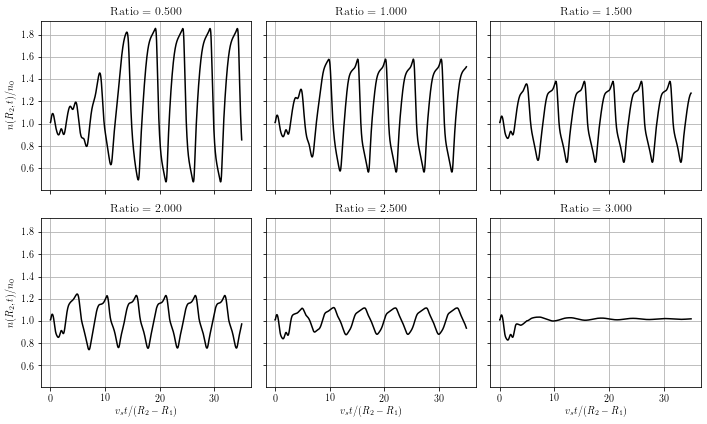

In [8]:
# Varying ratio at Mendl et al. parameters
fig1, axes1 = plt.subplots(2, 3, figsize = (10, 6), sharex = True, sharey = True)
t = np.linspace(0.0, k * len(n_dict[ratios[0]][:,-1]), len(n_dict[ratios[0]][:,-1]))
index = 1
for list in axes1:
    for axis in list:
        axis.plot(t, n_dict[ratios[index]][:,-1], color = "Black")
        axis.set_title("Ratio = {:.3f}".format(ratios[index]))
        axis.grid()
        index += 1
    for axis in axes1[-1]:
        axis.set_xlabel("$v_s t / (R_2 - R_1)$")
    for axis in [list[0] for list in axes1]:
        axis.set_ylabel("$n(R_2, t) / n_0$")
plt.tight_layout()
plt.savefig("Figures/varyRatio.pdf")
plt.show()


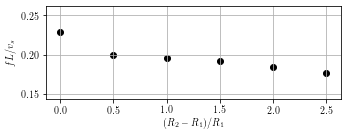

In [32]:
def frequency(array, timeStep):
    new = array[len(array) // 2 :]
    indices = []
    for i in range(len(new) - 1):
        if new[i+1] > 1.01 and new[i] < 1.01:
            indices.append(i)
    if len(indices) >= 2:
        freq = 1. / (timeStep * (indices[1] - indices[0]))
    else:
        freq = 0
    return freq

freqs = []
for ratio in ratios[:-1]:
    freqs.append(frequency(n_dict[ratio][:,-1], k))
    
fig2 = plt.figure(figsize = (5,2))
plt.grid()
plt.scatter(ratios[:-1], freqs, color = "Black")
plt.xlabel("$(R_2 - R_1) / R_1$")
plt.ylabel("$fL / v_s$")
plt.tight_layout()
plt.savefig("Figures/frequencyRatio.pdf")
plt.show()

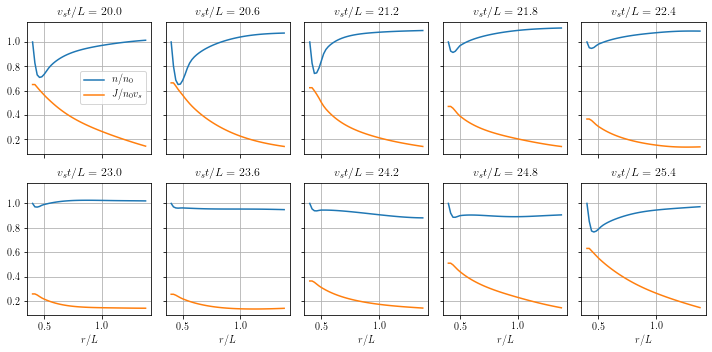

In [31]:
fig3, axes3 = plt.subplots(2, 5, figsize = (10,5), sharex = True, sharey = True)
J_snapshots = []
n_snapshots = []
delta = 0.6 #time difference between snapshots in seconds
start = 20. #time to start snapshots in seconds
J_list = J_dict[2.5]
n_list = n_dict[2.5]
xMid = np.arange(0.4, 1.4, 1 / 50)
for number in range(10):
    index = int((start + delta * number) / k)
    J_snapshots.append(J_list[index])
    n_snapshots.append(n_list[index])
for i in range(len(n_snapshots)):
    n_snapshots[i] = np.hstack((np.array([1]), n_snapshots[i]))
    J_snapshots[i] = np.hstack((np.array(J_snapshots[i][0]), J_snapshots[i]))
    
index = 0
for i in axes3:
    for axis in i:
        axis.grid()
        axis.plot(xMid, n_snapshots[index], label = "$n/n_0$")
        axis.plot(xMid, J_snapshots[index], label = "$J/n_0v_s$")
        axis.set_title("$v_st/L = {:.1f}$".format(start + delta * index))
        index += 1
for axis in axes3[-1]:
    axis.set_xlabel("$r/L$") #Set label only on the bottom axes
axes3[0,0].legend()
fig3.tight_layout()
plt.savefig("Figures/varyRatioSnapshot.pdf")
plt.show()